In [67]:
import csv
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
import custom_classes as cc

In [7]:
reload(cc)

<module 'custom_classes' from '/home/quantumfox/JupyterWorkfolder/Py3/tf_workbench/ANN/custom_classes.py'>

In [64]:
%cd ..

/home/quantumfox/JupyterWorkfolder/Py3/tf_workbench/ANN


In [66]:
%cd model_sym/

/home/quantumfox/JupyterWorkfolder/Py3/tf_workbench/ANN/model_sym


In [5]:
np.set_printoptions(precision=3, suppress=True, linewidth=75)

In [69]:
src_data = np.array([])
with open('../data_ANN_full.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        src_data = np.append(src_data, row)

src_data = src_data.astype(float)
src_data = src_data.reshape(23, 20045)

src_data_names = np.array([])
with open('../data_ANN_full_names.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        src_data_names = np.append(src_data_names, row)

data_dict = dict(zip(src_data_names, src_data))

In [72]:
data_2d = np.vstack((
    data_dict['T0cp'][data_dict['MainGenPower']>0],
    data_dict['B'][data_dict['MainGenPower']>0],
    data_dict['GT1'][data_dict['MainGenPower']>0],
    data_dict['MainGenPower'][data_dict['MainGenPower']>0],
    data_dict['OutputPower'][data_dict['MainGenPower']>0],
    data_dict['TurbineExitTemp'][data_dict['MainGenPower']>0],
    data_dict['EngineSpeed'][data_dict['MainGenPower']>0],)).T

In [71]:
col = 3
bins = 7
count = 1000
_, datawidth = data_2d.shape
data_2d = np.random.permutation(data_2d)
datamin, datamax = (data_2d[:, col].min(), data_2d[:, col].max())
databins = [np.array([]),]*bins
step = (datamax - datamin)/bins
cur = 0
threshold = []
for _ in range(bins):
    threshold.append(cur)
    cur = cur + step
threshold = threshold[::-1]
for item, pos in zip(data_2d[:, col], range(data_2d[:, col].size)):
    for dbin, thr in zip(range(bins), threshold):
        if item > thr:
            if len(databins[dbin]) >= count:
                break
            else:
                databins[dbin] = np.append(databins[dbin], data_2d[pos])
                binlen = databins[dbin].size
                databins[dbin] = databins[dbin].reshape(int(binlen/datawidth), datawidth)
                break

res = np.array([])
for dbin in databins:
    res = np.append(res, dbin)
reslen = res.size
res = res.reshape(int(reslen/datawidth), datawidth)

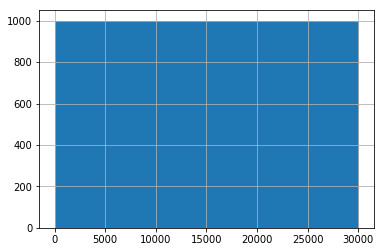

In [12]:
plt.figure()
plt.hist(res[:,3], threshold[::-1])
plt.grid()
plt.show()

In [180]:
sw = cc.StatWorker(data_2d)

sw.uniformize_2d(7,3)

learnset_uniform = sw.get_data()

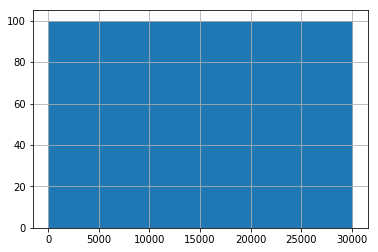

In [16]:
plt.figure()
plt.hist(sw.get_data()[:,3], threshold[::-1])
plt.grid()
plt.show()

In [185]:
threshold = 1.
for index in range(len(learnset_uniform[:,0])):
    if learnset_uniform[index, 2] <= threshold:
        learnset_uniform = np.delete(learnset_uniform, index,0)
    if index >= len(learnset_uniform[:,0]) - 1:
        break

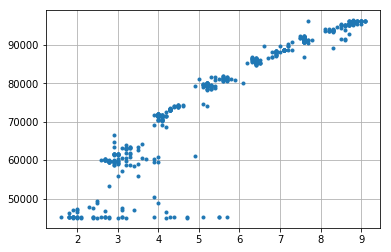

In [186]:
plt.figure()
plt.plot(learnset_uniform[:,2], learnset_uniform[:,6], '.')
plt.grid()
plt.show()

In [177]:
with open('data_m_uniform.csv', 'w') as datafile:
    writer = csv.writer(datafile)
    writer.writerows(learnset_uniform)